## Importing the relevant libraries

In [8]:
!pip install torchinfo

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings, torch, nltk, time, string, re
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
from collections import Counter
from torchinfo import summary

In [10]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


## Creating a sample text document

In [12]:
document = """
Life is a journey, filled with unexpected twists, difficult moments, and obstacles that can often leave us feeling uncertain and overwhelmed. 
Yet, within every challenge lies an opportunity for growth, a chance to discover the depth of our resilience and the power of perseverance. 
Resilience is not simply the ability to bounce back from adversity but the capacity to transform that adversity into a catalyst for personal development and strength.
Challenges, whether personal or professional, can be deeply unsettling. 
They may come in the form of a failed relationship, a lost job, or the struggle of a health issue. 
At first glance, it may seem impossible to see any silver lining when everything feels like it’s falling apart. 
But it is precisely in these moments that we are called to tap into our innate resilience. 
Resilience doesn’t mean avoiding pain or hardship—it means finding the courage to move forward, even when life seems uncertain.
Resilience is a skill that can be developed. 
It’s not something we’re born with, but something that is nurtured over time, through our experiences. 
One of the key aspects of resilience is the ability to reframe negative events and approach them with a mindset of growth. 
Rather than seeing failure as a final destination, we learn to view it as a temporary setback, an opportunity for learning. 
This shift in perspective can be incredibly liberating and can help us approach challenges with a sense of possibility.
At its core, resilience is rooted in the belief that we have the ability to overcome difficulties and emerge stronger. 
This belief is what propels us forward in the face of adversity. 
It's not about denying the emotional toll that challenges take on us, but about recognizing that we have the inner resources to cope, adapt, and eventually thrive.
The process of becoming resilient often involves discomfort. 
Growth rarely occurs in the absence of struggle. 
When we face adversity, we are forced to confront our limitations, fears, and vulnerabilities. 
It’s in these moments of discomfort that we are presented with an opportunity for change. 
Whether it’s learning new coping mechanisms, seeking support from others, or discovering new strengths within ourselves, challenges force us to stretch beyond our comfort zones.
Through hardship, we often learn more about ourselves than we do in moments of ease. 
Our true character is revealed when we are pushed to our limits. 
The person we become on the other side of a challenge is often more confident, more compassionate, and more equipped to handle whatever comes next. 
In this way, challenges do not break us; they shape us into the person we are destined to become.
One of the most profound aspects of resilience is the role of perspective. 
When faced with challenges, it’s easy to become overwhelmed by the weight of the situation. 
But by taking a step back and adopting a broader perspective, we can begin to see the bigger picture. 
We are not defined by a single moment or event, but by how we respond to it. 
Our ability to find meaning in adversity is what transforms it into a stepping stone for personal growth.
Moreover, resilience is not just an individual trait—it is something that can be nurtured in communities. 
The support of friends, family, and colleagues can play a vital role in building resilience. 
When we face challenges together, we draw strength from one another, and our collective resilience becomes greater than the sum of its parts. 
This interconnectedness reminds us that we are never truly alone in our struggles.
While it’s important to cultivate resilience, it’s equally important to practice self-compassion. 
Resilience does not mean pushing ourselves to the point of exhaustion or ignoring our emotional needs. 
It means allowing ourselves the space to feel, to heal, and to recover when necessary. 
Resilience is about finding balance—knowing when to push forward and when to take a step back. 
By embracing both our strength and vulnerability, we honor our human experience and allow ourselves to grow in meaningful ways.
Another crucial aspect of resilience is the ability to adapt. 
The world around us is constantly changing, and challenges often require us to adjust our thinking, behaviors, and actions. 
Adaptability is a key component of resilience because it allows us to navigate uncertainty with confidence and flexibility. 
Rather than resisting change, we learn to embrace it, knowing that each new experience provides an opportunity for growth and learning.
In the face of adversity, it’s easy to fall into the trap of self-doubt. 
We may question our abilities or wonder if we are capable of overcoming the challenges before us. 
But resilience is built on the foundation of self-belief. 
It’s about trusting ourselves, even when the road ahead is unclear. 
The more we practice self-belief, the stronger our resilience becomes.
At times, resilience can feel like an uphill battle, but it’s important to remember that every step forward, no matter how small, is progress. 
It’s easy to become discouraged when we don’t see immediate results, but change takes time. 
Trusting the process and allowing ourselves to grow at our own pace is essential to building long-term resilience.
In the grand scheme of life, challenges are inevitable. 
They will come in many forms—some expected, others unexpected. 
However, it’s how we respond to these challenges that defines us. 
Resilience gives us the power to rise above adversity, to grow from it, and to emerge stronger than before. 
It’s not about avoiding hardship; it’s about embracing the lessons it offers and using them as fuel for our continued growth.
Ultimately, the journey of resilience is a journey of transformation. 
Each challenge we face shapes us in ways we may not fully understand at the time. 
But with each challenge, we become more resilient, more capable, and more prepared to navigate the next chapter of our lives. 
Life’s difficulties are not roadblocks; they are stepping stones toward the person we are meant to become.
The road to resilience may not always be smooth, but it is always worthwhile. 
Embrace the challenges, trust in your ability to overcome them, and know that each step you take brings you closer to becoming the best version of yourself. 
Life’s obstacles are not the end—they are merely the beginning of a new chapter, one in which you emerge stronger, wiser, and more resilient than ever before.
"""

## Text Preprocessing

In [13]:
def filter_tokens(tokens):
    allowed_chars = set(string.ascii_letters + string.digits + string.punctuation + " ")
    contraction_pattern = re.compile(r"\b\w+'\w+\b")
    filtered_tokens = [token for token in tokens if any(char in allowed_chars for char in token) or contraction_pattern.match(token)]
    return filtered_tokens

In [14]:
tokens = word_tokenize(document.lower())
tokens = filter_tokens(tokens)
len(tokens)

1210

In [15]:
tokens[:20]

['life',
 'is',
 'a',
 'journey',
 ',',
 'filled',
 'with',
 'unexpected',
 'twists',
 ',',
 'difficult',
 'moments',
 ',',
 'and',
 'obstacles',
 'that',
 'can',
 'often',
 'leave',
 'us']

In [16]:
vocab = {'<unk>': 0}

In [17]:
for token in Counter(tokens).keys():
    if token not in vocab:
        vocab[token] = len(vocab)
len(vocab)

418

In [18]:
sentences = document.split('\n')
sentences = [sentence for sentence in sentences if sentence]
len(sentences)

63

In [19]:
def text_to_indices(sentence, vocab):
  tokens = word_tokenize(text=sentence.lower())
  indices = []

  for token in tokens:
    if token in vocab:
      indices.append(vocab[token])
    else:
      indices.append(vocab['<unk>'])

  return indices

In [20]:
numerical_sentences = []

for sentence in sentences:
    numerical_sentences.append(text_to_indices(sentence.lower(),vocab))

len(numerical_sentences)

63

In [21]:
training_sequences = []

for sentence in numerical_sentences:
    for i in range(1,len(sentence)):
        training_sequences.append(sentence[:i+1])

len(training_sequences)

1166

In [22]:
training_sequences[:5]

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]

In [23]:
lengths = []

for sentence in training_sequences:
    lengths.append(len(sentence))

max_len = max(lengths)
max_len

33

In [24]:
def pad_sequences(text,vocab_size):
    text = [0] * (vocab_size-len(text)) + text
    return text

In [25]:
padded_numerical_sentences = []

for sentence in training_sequences:
    padded_numerical_sentences.append(pad_sequences(sentence,max_len))

len(padded_numerical_sentences)

1166

In [26]:
padded_numerical_sentences[4]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6]

In [27]:
padded_numerical_sentences = torch.tensor(padded_numerical_sentences,dtype=torch.long)

## Extracting the features and labels

In [28]:
X = padded_numerical_sentences[:,:-1]
y = padded_numerical_sentences[:,-1]

In [29]:
X.shape, y.shape

(torch.Size([1166, 32]), torch.Size([1166]))

## Creating a Custom Dataset and Data Loader

In [30]:
class CustomDataset(Dataset):
    
    def __init__(self,X,y):
        super().__init__()
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self,index):
        return self.X[index], self.y[index]

In [31]:
torch.manual_seed(42)
dataset = CustomDataset(X,y)
dataset

In [32]:
data_loader = DataLoader(dataset=dataset,batch_size=32,shuffle=True)
data_loader

In [33]:
for input_seq, output_seq in data_loader:
    print(input_seq)
    print(output_seq)
    break

tensor([[  0,   0,   0,  ..., 157, 130,   5],
        [  0,   0,   0,  ...,   0,   0,  35],
        [  0,   0,   0,  ...,  14,  15,  16],
        ...,
        [  0,   0,   0,  ..., 137, 138,   5],
        [  0,   0,   0,  ...,   0,  90, 165],
        [  0,   0,   0,  ...,  47, 198,   5]])
tensor([ 12, 351,  17, 169,  18, 331, 382,  16, 396, 415, 242, 293, 397,  12,
        398,   5, 261, 139,  37,  57,  22, 266,  24,  22,  35,   5, 102,   3,
        100,  95, 303,  59])


## Defining Bidirectional LSTM Model Architecture

In [34]:
class BidirectionalLSTM(nn.Module):
    
    def __init__(self, vocab_size):
        super(BidirectionalLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, 200) 
        self.lstm = nn.LSTM(200, 150, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
        self.linear = nn.Sequential(
            nn.Linear(150 * 2, 512), 
            nn.ReLU(),
            nn.Linear(512, vocab_size)
        )

    def forward(self, X):
        embeddings = self.embedding(X)
        lstm_out, (final_hidden_state, final_cell_state) = self.lstm(embeddings)
        # Since it's a bidirectional LSTM, final_hidden_state has shape (num_layers * num_directions, batch_size, hidden_size)
        # We want the final hidden state from the last layer and both directions. 
        final_hidden_state = final_hidden_state[-2:].transpose(0, 1).contiguous().view(X.size(0), -1) 
        output = self.linear(final_hidden_state)
        return output

In [35]:
torch.manual_seed(42)
lstm = BidirectionalLSTM(len(vocab))
lstm

BidirectionalLSTM(
  (embedding): Embedding(418, 200)
  (lstm): LSTM(200, 150, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (linear): Sequential(
    (0): Linear(in_features=300, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=418, bias=True)
  )
)

In [36]:
lstm = lstm.to(device)
lstm

BidirectionalLSTM(
  (embedding): Embedding(418, 200)
  (lstm): LSTM(200, 150, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (linear): Sequential(
    (0): Linear(in_features=300, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=418, bias=True)
  )
)

In [37]:
summary(lstm)

Layer (type:depth-idx)                   Param #
BidirectionalLSTM                        --
├─Embedding: 1-1                         83,600
├─LSTM: 1-2                              964,800
├─Sequential: 1-3                        --
│    └─Linear: 2-1                       154,112
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       214,434
Total params: 1,416,946
Trainable params: 1,416,946
Non-trainable params: 0

In [38]:
total_params = 0

for param in lstm.parameters():
    print(param.numel())
    total_params += param.numel()

print("Total parameters of the LSTM model:", total_params)

83600
120000
90000
600
600
120000
90000
600
600
180000
90000
600
600
180000
90000
600
600
153600
512
214016
418
Total parameters of the LSTM model: 1416946


In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=lstm.parameters(),lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

## Training the LSTM model

In [40]:
epochs = 100

train_losses = []
train_accuracies = []

start_time = time.time()

for i in range(1, epochs + 1):
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    for input_seq, output_seq in data_loader:
        input_seq, output_seq = input_seq.to(device), output_seq.to(device)
        optimizer.zero_grad()
        
        output = lstm(input_seq)
        loss = criterion(output, output_seq)
        
        loss.backward()

        nn.utils.clip_grad_norm_(lstm.parameters(), max_norm=5.0)

        optimizer.step()
        values, predicted_indexes = torch.max(output,dim=1)
        correct_predictions += (predicted_indexes == output_seq).sum().item()
        total_samples += output_seq.size(0)
        total_loss += loss.item()

    train_losses.append(total_loss)
    accuracy = correct_predictions / total_samples * 100
    train_accuracies.append(accuracy)
    
    scheduler.step()

    print(f"Epoch {i} -> Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

print(f"Total time elapsed in LSTM model training: {(time.time() - start_time) / 60:.2f} minutes")

Epoch 1 -> Loss: 206.8215, Accuracy: 6.17%
Epoch 2 -> Loss: 190.1162, Accuracy: 7.38%
Epoch 3 -> Loss: 179.7979, Accuracy: 10.12%
Epoch 4 -> Loss: 167.1183, Accuracy: 13.46%
Epoch 5 -> Loss: 154.5953, Accuracy: 18.10%
Epoch 6 -> Loss: 141.8520, Accuracy: 23.07%
Epoch 7 -> Loss: 127.6318, Accuracy: 26.42%
Epoch 8 -> Loss: 114.4048, Accuracy: 31.90%
Epoch 9 -> Loss: 100.8769, Accuracy: 35.51%
Epoch 10 -> Loss: 88.1402, Accuracy: 41.25%
Epoch 11 -> Loss: 75.0970, Accuracy: 47.00%
Epoch 12 -> Loss: 62.3135, Accuracy: 52.92%
Epoch 13 -> Loss: 51.4179, Accuracy: 60.63%
Epoch 14 -> Loss: 41.9578, Accuracy: 68.35%
Epoch 15 -> Loss: 35.3829, Accuracy: 72.81%
Epoch 16 -> Loss: 29.5642, Accuracy: 78.04%
Epoch 17 -> Loss: 23.9450, Accuracy: 81.56%
Epoch 18 -> Loss: 18.7162, Accuracy: 87.65%
Epoch 19 -> Loss: 15.4550, Accuracy: 88.68%
Epoch 20 -> Loss: 13.5070, Accuracy: 90.31%
Epoch 21 -> Loss: 9.6852, Accuracy: 93.83%
Epoch 22 -> Loss: 7.7843, Accuracy: 95.03%
Epoch 23 -> Loss: 7.1193, Accuracy: 

## Model Performance Visualization

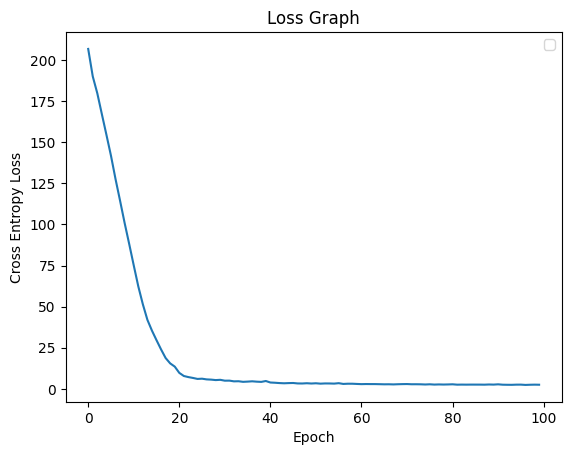

In [41]:
plt.plot(range(epochs),train_losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Graph')
plt.legend()
plt.show();

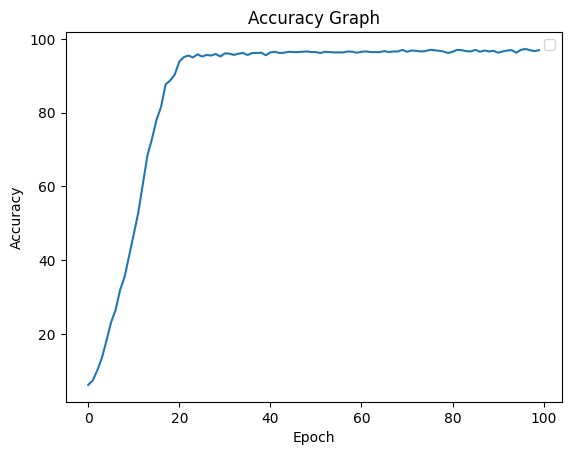

In [42]:
plt.plot(range(epochs),train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show();

## Model Inference

In [43]:
def predict_next_word(model, vocab, text):
      numerical_text = text_to_indices(text, vocab)
      padded_text = torch.tensor([0] * (len(vocab) - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0).to(device)
      output = model(padded_text)
      value, index = torch.max(output, dim=1)
      return text + " " + list(vocab.keys())[index]

In [44]:
def display_next_word_predictions(num_tokens,query):
    
    for i in range(num_tokens):
        output = predict_next_word(lstm,vocab,query)
        print(output)
        query = output
        time.sleep(0.5)

In [45]:
display_next_word_predictions(15,"Each challenge we face")

Each challenge we face shapes
Each challenge we face shapes us
Each challenge we face shapes us in
Each challenge we face shapes us in ways
Each challenge we face shapes us in ways we
Each challenge we face shapes us in ways we may
Each challenge we face shapes us in ways we may not
Each challenge we face shapes us in ways we may not fully
Each challenge we face shapes us in ways we may not fully understand
Each challenge we face shapes us in ways we may not fully understand at
Each challenge we face shapes us in ways we may not fully understand at the
Each challenge we face shapes us in ways we may not fully understand at the time
Each challenge we face shapes us in ways we may not fully understand at the time .
Each challenge we face shapes us in ways we may not fully understand at the time . .
Each challenge we face shapes us in ways we may not fully understand at the time . . .


In [46]:
display_next_word_predictions(15,"The road to")

The road to resilience
The road to resilience may
The road to resilience may not
The road to resilience may not always
The road to resilience may not always be
The road to resilience may not always be smooth
The road to resilience may not always be smooth ,
The road to resilience may not always be smooth , but
The road to resilience may not always be smooth , but it
The road to resilience may not always be smooth , but it is
The road to resilience may not always be smooth , but it is always
The road to resilience may not always be smooth , but it is always worthwhile
The road to resilience may not always be smooth , but it is always worthwhile .
The road to resilience may not always be smooth , but it is always worthwhile . .
The road to resilience may not always be smooth , but it is always worthwhile . . .


In [47]:
display_next_word_predictions(20,"In the face of")

In the face of adversity
In the face of adversity ,
In the face of adversity , it
In the face of adversity , it <unk>
In the face of adversity , it <unk> s
In the face of adversity , it <unk> s easy
In the face of adversity , it <unk> s easy to
In the face of adversity , it <unk> s easy to become
In the face of adversity , it <unk> s easy to become overwhelmed
In the face of adversity , it <unk> s easy to become overwhelmed by
In the face of adversity , it <unk> s easy to become overwhelmed by the
In the face of adversity , it <unk> s easy to become overwhelmed by the weight
In the face of adversity , it <unk> s easy to become overwhelmed by the weight of
In the face of adversity , it <unk> s easy to become overwhelmed by the weight of the
In the face of adversity , it <unk> s easy to become overwhelmed by the weight of the situation
In the face of adversity , it <unk> s easy to become overwhelmed by the weight of the situation .
In the face of adversity , it <unk> s easy to become ove

In [48]:
display_next_word_predictions(20,"One of the most")

One of the most profound
One of the most profound aspects
One of the most profound aspects of
One of the most profound aspects of resilience
One of the most profound aspects of resilience is
One of the most profound aspects of resilience is the
One of the most profound aspects of resilience is the ability
One of the most profound aspects of resilience is the ability to
One of the most profound aspects of resilience is the ability to reframe
One of the most profound aspects of resilience is the ability to reframe negative
One of the most profound aspects of resilience is the ability to reframe negative events
One of the most profound aspects of resilience is the ability to reframe negative events and
One of the most profound aspects of resilience is the ability to reframe negative events and approach
One of the most profound aspects of resilience is the ability to reframe negative events and approach them
One of the most profound aspects of resilience is the ability to reframe negative 

In [49]:
display_next_word_predictions(24,"Resilience is not simply")

Resilience is not simply the
Resilience is not simply the ability
Resilience is not simply the ability to
Resilience is not simply the ability to bounce
Resilience is not simply the ability to bounce back
Resilience is not simply the ability to bounce back from
Resilience is not simply the ability to bounce back from adversity
Resilience is not simply the ability to bounce back from adversity but
Resilience is not simply the ability to bounce back from adversity but the
Resilience is not simply the ability to bounce back from adversity but the capacity
Resilience is not simply the ability to bounce back from adversity but the capacity to
Resilience is not simply the ability to bounce back from adversity but the capacity to transform
Resilience is not simply the ability to bounce back from adversity but the capacity to transform that
Resilience is not simply the ability to bounce back from adversity but the capacity to transform that adversity
Resilience is not simply the ability to bou

In [50]:
display_next_word_predictions(32,"Whether it's learning")

Whether it's learning with
Whether it's learning with it
Whether it's learning with it <unk>
Whether it's learning with it <unk> s
Whether it's learning with it <unk> s obstacles
Whether it's learning with it <unk> s obstacles are
Whether it's learning with it <unk> s obstacles are not
Whether it's learning with it <unk> s obstacles are not the
Whether it's learning with it <unk> s obstacles are not the end—they
Whether it's learning with it <unk> s obstacles are not the end—they are
Whether it's learning with it <unk> s obstacles are not the end—they are merely
Whether it's learning with it <unk> s obstacles are not the end—they are merely the
Whether it's learning with it <unk> s obstacles are not the end—they are merely the beginning
Whether it's learning with it <unk> s obstacles are not the end—they are merely the beginning of
Whether it's learning with it <unk> s obstacles are not the end—they are merely the beginning of a
Whether it's learning with it <unk> s obstacles are not t

In [51]:
display_next_word_predictions(15,"It means allowing")

It means allowing ourselves
It means allowing ourselves the
It means allowing ourselves the space
It means allowing ourselves the space to
It means allowing ourselves the space to feel
It means allowing ourselves the space to feel ,
It means allowing ourselves the space to feel , to
It means allowing ourselves the space to feel , to heal
It means allowing ourselves the space to feel , to heal ,
It means allowing ourselves the space to feel , to heal , and
It means allowing ourselves the space to feel , to heal , and to
It means allowing ourselves the space to feel , to heal , and to recover
It means allowing ourselves the space to feel , to heal , and to recover when
It means allowing ourselves the space to feel , to heal , and to recover when necessary
It means allowing ourselves the space to feel , to heal , and to recover when necessary .


## Saving the model

In [52]:
torch.save(lstm,'next_word_predictor.pt')